In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.dates as mdates

In [2]:
df = pd.read_csv('household_power_consumption.txt', delimiter=';', na_values='?')

In [3]:
df

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.000,239.70,3.8,0.0,0.0,0.0


- The dataset has 2075259 rows and 9 columns
- 7 columns are decimal number, pandas will default to float64 which mean 8 bytes for each number.
- 2 other columns will be considered string by pandas, so each entry will take 8 bytes each.
- So the amount of memory this dataset will consume is;

In [4]:
(2075259 * 9 * 8) / 2**20

142.4967269897461

about 142.5 MiB

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    float64
 3   Global_reactive_power  float64
 4   Voltage                float64
 5   Global_intensity       float64
 6   Sub_metering_1         float64
 7   Sub_metering_2         float64
 8   Sub_metering_3         float64
dtypes: float64(7), object(2)
memory usage: 142.5+ MB


## select data from 2007-02-01 to 2007-02-02

In [6]:
date_sr = pd.to_datetime(df['Date'], format='%d/%m/%Y')
mask = (date_sr >= '2007-02-01') & (date_sr <= '2007-02-02')
df = df[mask].copy()

In [7]:
df

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
66636,1/2/2007,00:00:00,0.326,0.128,243.15,1.4,0.0,0.0,0.0
66637,1/2/2007,00:01:00,0.326,0.130,243.32,1.4,0.0,0.0,0.0
66638,1/2/2007,00:02:00,0.324,0.132,243.51,1.4,0.0,0.0,0.0
66639,1/2/2007,00:03:00,0.324,0.134,243.90,1.4,0.0,0.0,0.0
66640,1/2/2007,00:04:00,0.322,0.130,243.16,1.4,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
69511,2/2/2007,23:55:00,3.696,0.226,240.90,15.2,0.0,1.0,18.0
69512,2/2/2007,23:56:00,3.698,0.226,241.02,15.2,0.0,2.0,18.0
69513,2/2/2007,23:57:00,3.684,0.224,240.48,15.2,0.0,1.0,18.0
69514,2/2/2007,23:58:00,3.658,0.220,239.61,15.2,0.0,1.0,17.0


In [8]:
df.isna().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

- No missing values. Looking good.

In [9]:
datetime_str_sr = df['Date'] + ' ' + df['Time']
df['DateTime'] = pd.to_datetime(datetime_str_sr, format='%d/%m/%Y %H:%M:%S')

In [10]:
df

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DateTime
66636,1/2/2007,00:00:00,0.326,0.128,243.15,1.4,0.0,0.0,0.0,2007-02-01 00:00:00
66637,1/2/2007,00:01:00,0.326,0.130,243.32,1.4,0.0,0.0,0.0,2007-02-01 00:01:00
66638,1/2/2007,00:02:00,0.324,0.132,243.51,1.4,0.0,0.0,0.0,2007-02-01 00:02:00
66639,1/2/2007,00:03:00,0.324,0.134,243.90,1.4,0.0,0.0,0.0,2007-02-01 00:03:00
66640,1/2/2007,00:04:00,0.322,0.130,243.16,1.4,0.0,0.0,0.0,2007-02-01 00:04:00
...,...,...,...,...,...,...,...,...,...,...
69511,2/2/2007,23:55:00,3.696,0.226,240.90,15.2,0.0,1.0,18.0,2007-02-02 23:55:00
69512,2/2/2007,23:56:00,3.698,0.226,241.02,15.2,0.0,2.0,18.0,2007-02-02 23:56:00
69513,2/2/2007,23:57:00,3.684,0.224,240.48,15.2,0.0,1.0,18.0,2007-02-02 23:57:00
69514,2/2/2007,23:58:00,3.658,0.220,239.61,15.2,0.0,1.0,17.0,2007-02-02 23:58:00


### Plot 1

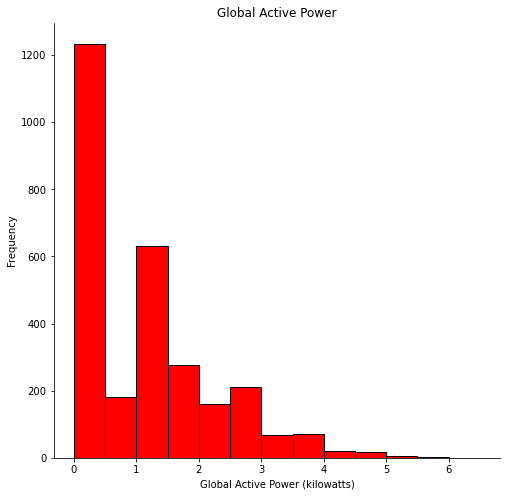

In [11]:
fig, ax = plt.subplots(figsize=(8, 8))
# plot histogram
ax.hist(df['Global_active_power'], bins=np.arange(0, 7, 0.5), edgecolor='black', color='red')
# hide top and right axis
ax.spines[['right','top']].set_visible(False)
ax.set_ylabel('Frequency')
ax.set_xlabel('Global Active Power (kilowatts)')
ax.set_title('Global Active Power')
# ax.tick_params(axis='x', pad=10)
# ax.tick_params(axis='y', pad=30)
fig.savefig('plot1.png')

### Plot 2

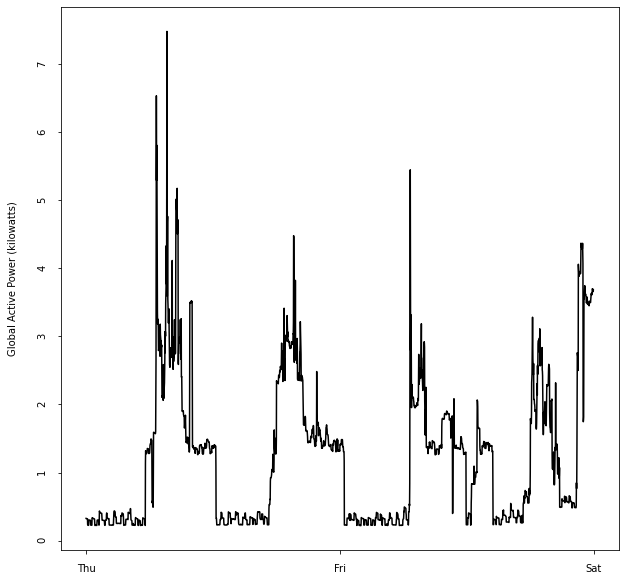

In [12]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot('DateTime', 'Global_active_power', data=df, color='black')

ax.set_ylabel('Global Active Power (kilowatts)', labelpad=20)
ax.tick_params(axis='y', labelrotation = 90, pad=10)
ax.tick_params(axis='x', pad=10)

ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%a'))

plt.savefig('plot2.png')

### Plot 3

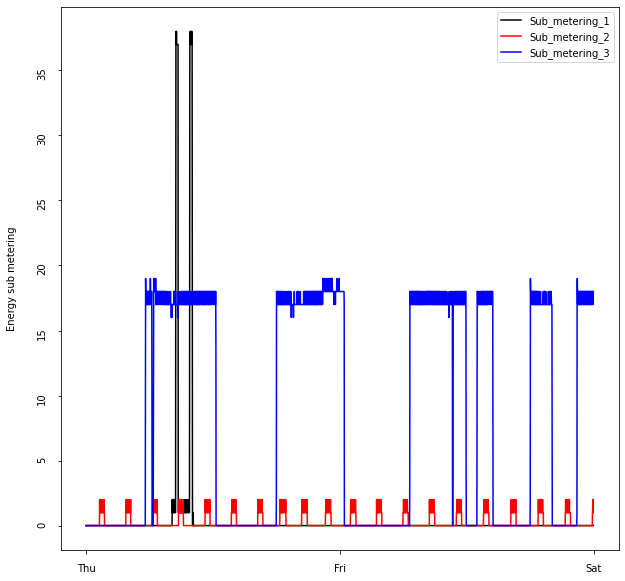

In [13]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot('DateTime', 'Sub_metering_1', data=df, color='black')
ax.plot('DateTime', 'Sub_metering_2', data=df, color='red')
ax.plot('DateTime', 'Sub_metering_3', data=df, color='blue')

ax.set_ylabel('Energy sub metering', labelpad=20)
ax.tick_params(axis='y', labelrotation = 90, pad=10)
ax.tick_params(axis='x', pad=10)

ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%a'))
ax.legend()
plt.savefig('plot3.png')

### Plot 4